In [526]:
pwd

'/Users/srikanthbhadragiri/Datamites'

In [527]:
cd datasets

/Users/srikanthbhadragiri/Datamites/datasets


In [528]:
ls

Hospitals count in India - Statewise.csv


In [529]:
cd ..

/Users/srikanthbhadragiri/Datamites


In [530]:
import pandas as pd

In [531]:
df = pd.read_csv('./datasets/Hospitals count in India - Statewise.csv')

In [532]:
df.shape

(37, 4)

In [533]:
df.dtypes

States/UTs                                    object
Number of hospitals in public sector          object
Number of hospitals in private sector         object
Total number of hospitals (public+private)    object
dtype: object

In [534]:
df.head()

,States/UTs,Number of hospitals in public sector,Number of hospitals in private sector,Total number of hospitals (public+private)
0,Lakshadweep,9,4,13
1,Chandigarh,9,4,13
2,Dadra & N Haveli,12,6,18
3,Puducherry,14,6,20
4,Daman & Diu,5,21,26


In [535]:
df.describe()

,States/UTs,Number of hospitals in public sector,Number of hospitals in private sector,Total number of hospitals (public+private)
count,37,36,36,36
unique,37,34,31,35
top,Kerala,9,6,13
freq,1,2,3,2


In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   States/UTs                                  37 non-null     object
 1   Number of hospitals in public sector        36 non-null     object
 2   Number of hospitals in private sector       36 non-null     object
 3   Total number of hospitals (public+private)  36 non-null     object
dtypes: object(4)
memory usage: 1.3+ KB


### Initial Analysis
- Dataset consists of 4 columns and 37 rows of data
- Data represents various states/UTs, the count of hospitals in private, public sectors and Total count of hostitals

### What to infer?
- which states/UTs has more number of hospitals.
    - Show a pie chart
    - Show a bar chart
- which states/UTs has more number of private hospitals when compared with public hospitals.
    - Show in a stacked bar chart

-- Get the population index of each state/ut and compare which states/uts population with number of hospitals.

- cleanup
    - Find any null values in hospital counts
    - what could be done to fill them up
    - All datatypes are of object type.
        - convert Number of hospitals in public sector, private sector and total hospitals to int datatype

In [537]:
# Get list of all rows where we have null values in any columns

df[df['Number of hospitals in public sector'].isna() | 
   df['Number of hospitals in private sector'].isna() | 
   df['Total number of hospitals (public+private)'].isna()]

# *** Is there a better way to get this - 
#     mentioning all column names is not a viable option with datasets which have many column names. 

,States/UTs,Number of hospitals in public sector,Number of hospitals in private sector,Total number of hospitals (public+private)
36,Ladakh,NaN,NaN,NaN


### Inference:
    1. There is one row, with null values for all of the 3 columns. I feel its better delete the row.

In [538]:
# Drop a row from DataFrame based on index
df.drop([36], inplace=True)

In [539]:
# Code to replace 'comma' from values of three columns.
df['Number of hospitals in public sector'] = df['Number of hospitals in public sector'].str.replace(',', '')
df['Number of hospitals in private sector'] = df['Number of hospitals in private sector'].str.replace(',', '')
df['Total number of hospitals (public+private)'] = df['Total number of hospitals (public+private)'].str.replace(',', '')

In [540]:
df.dtypes

States/UTs                                    object
Number of hospitals in public sector          object
Number of hospitals in private sector         object
Total number of hospitals (public+private)    object
dtype: object

In [541]:
# convert three column datatype from str into int
df['Number of hospitals in public sector'] = df['Number of hospitals in public sector'].astype(int)
df['Number of hospitals in private sector'] = df['Number of hospitals in private sector'].astype(int)
df['Total number of hospitals (public+private)'] = df['Total number of hospitals (public+private)'].astype(int)

In [542]:
df.dtypes

States/UTs                                    object
Number of hospitals in public sector           int64
Number of hospitals in private sector          int64
Total number of hospitals (public+private)     int64
dtype: object

In [543]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [544]:
rcParams['figure.figsize'] = 10,8

In [545]:
# Show top 5 states/UT's with largest number of hospitals (both public and private)
sorted_df = df.sort_values('Total number of hospitals (public+private)', ascending=False)
sorted_df.head()

,States/UTs,Number of hospitals in public sector,Number of hospitals in private sector,Total number of hospitals (public+private)
35,Uttar Pradesh,4635,12468,17103
34,Karnataka,2842,7842,10684
33,Rajasthan,2850,2794,5644
32,Telangana,863,3247,4110
31,Kerala,1280,2062,3342


In [546]:
# Extract 3 columns of data (states, public hospitals, private hospitals) to show comparision
df_private_vs_public = sorted_df[['States/UTs',
                                  'Number of hospitals in public sector',
                                  'Number of hospitals in private sector']]
# Reset index values
df_private_vs_public.reset_index(drop=True).head()

,States/UTs,Number of hospitals in public sector,Number of hospitals in private sector
0,Uttar Pradesh,4635,12468
1,Karnataka,2842,7842
2,Rajasthan,2850,2794
3,Telangana,863,3247
4,Kerala,1280,2062


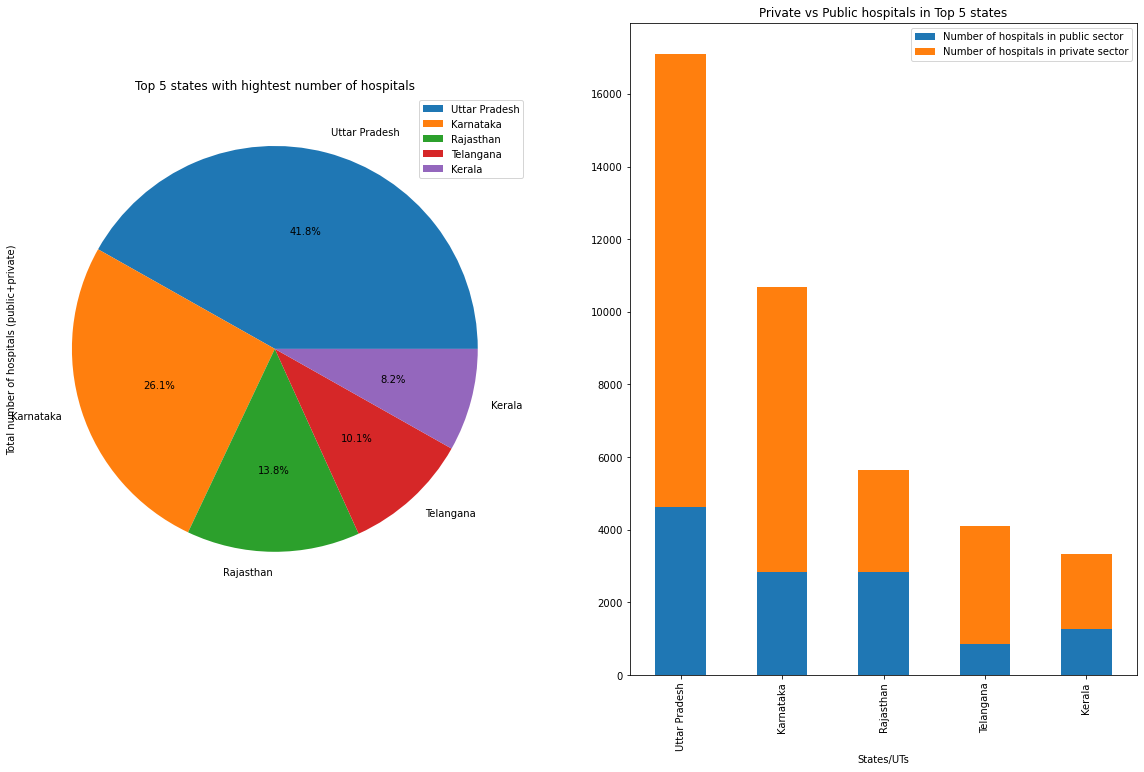

In [552]:
rcParams['figure.figsize'] = 20,12
figure, axes = plt.subplots(1,2)

stateNames = sorted_df['States/UTs'].head()

# Plot a pie chart in first subplot
# Display Top 5 states with hightest number of hospitals 
sorted_df.head().plot.pie(y='Total number of hospitals (public+private)', 
                          labels=stateNames, 
                          autopct="%1.1f%%",
                          ax=axes[0], 
                          title="Top 5 states with hightest number of hospitals")

# Plot a stacked bar chart in second subplot
# Display the data of top 5 states and compare the count of public vs private hospitals
df_private_vs_public.head().plot(kind='bar', 
                                 stacked=True, 
                                 x="States/UTs",
                                 ax=axes[1], title="Private vs Public hospitals in Top 5 states")

plt.show()